# **Kapasitas Panas Menurut Debye**

Persamaan yang menghubungkan kapasitas panas dengan suhu material dalam model Debye adalah sebagai berikut.

\begin{align}
C_v = 9 NK \left( \frac{T}{T_D} \right)^3 \int^{T_D/T}_0 \frac{x^4 e^x}{(e^x - 1)^2} dx
\end{align}

dengan



* $Cv$ = kapasitas panas
* $N$ = banyak partikel
* $T$ = suhu
* $T_D$ = suhu Debye
* $x$ = $\frac{hv}{kT}$   



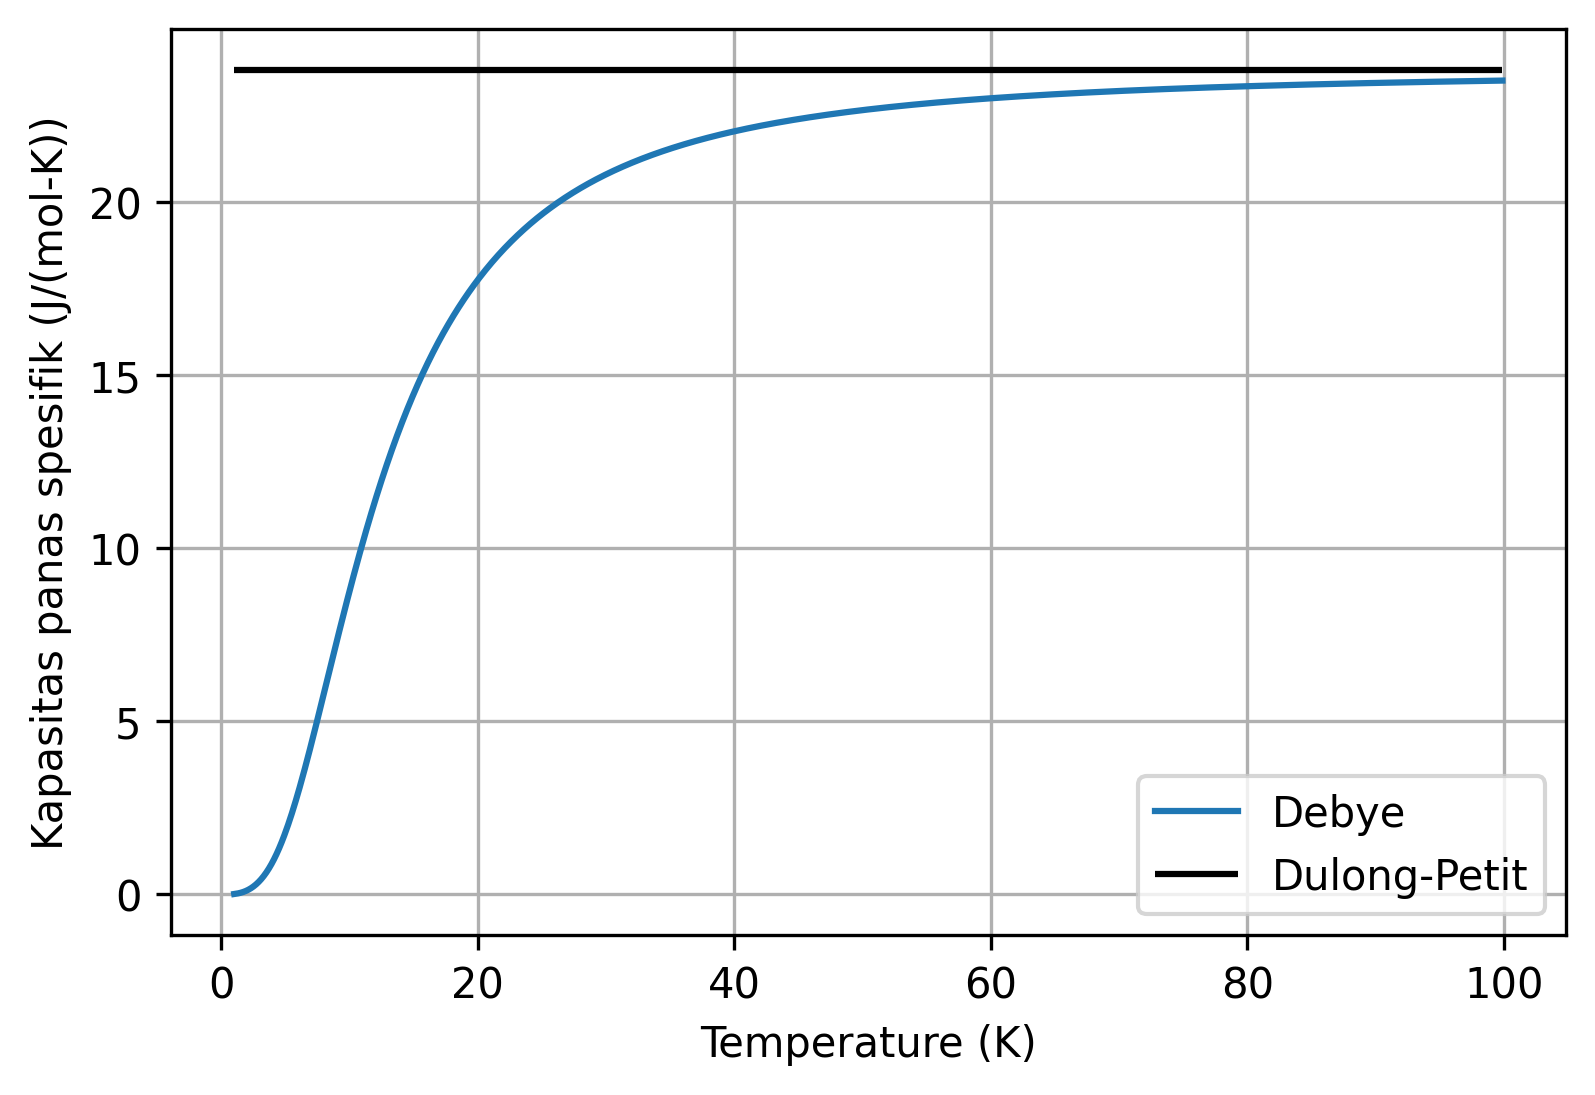

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

k  = 1.28e-23    # tetapan Boltzman
N  = 6.2e23      # banyal partikel per mol
Td = 343         # suhu Debye

def g(x):        # g adalah fungsi yang diintegralkan
  result = (x**4*np.exp(x))/(np.exp(x)-1)**2
  return result

T = np.arange(1, 2*Td, 0.1) # sumbu veritikal
Cv = []                     # sumbu horizontal

for i in range(0, len(T)):
  # G(x) adalah integral dari fungsi g(x)
  # lihat dokumentasi scipy.integrate.quad
  G = quad(g, 0, Td/T[i])[0] 
  
  if T[i] > Td/50:
    y = 9*N*k*G*(T[i]/Td)**3
  else:
    y = (12*N*k*np.pi**4)/5 * (T[i]/Td)**3 # temperatur sangat rendah
  Cv.append(y)

# plotting
plt.figure(dpi=300)
plt.plot(T, Cv, label="Debye")
plt.hlines(3*N*k, min(T), max(T), label="Dulong-Petit")
plt.xlabel("Temperature (K)")
plt.ylabel("Kapasitas panas spesifik (J/(mol-K))")
plt.legend()
plt.grid()
plt.show()

In [112]:
343/50

6.86